In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('./App_Behaviour/Subcription App Behaviour.csv')
df

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,14:51.3,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,16:00.9,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,19:09.2,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,08:46.4,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,11:49.5,0
4,51549,50:48.7,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,56:37.8,1
5,56480,58:15.8,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,59:03.3,0
6,144649,33:18.5,1,02:00:00,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,07:49.9,1,03:00:00,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0
8,372004,22:01.6,2,14:00:00,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,24:54.5,0
9,338013,22:16.0,4,18:00:00,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,31:58.9,0


In [3]:
df['enrolled_date'].isna().sum()

18926

In [4]:
df.isna().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

labels = df['enrolled']
features = df.drop(['enrolled_date','enrolled'], axis = 1)

screen_vocab = set([x for x in (','.join(df['screen_list'])).split(',')])
screen_index = {s:i for i,s in enumerate(screen_vocab)}
vocab_size = len(screen_vocab)

df_screen_indices = list(df['screen_list'].apply(lambda x : [screen_index[w] for w in x.split(',')]))

X_tot, X_Test, Y_tot, Y_Test = train_test_split(features, labels, test_size=0.1, random_state=20)
X_Train, X_validate, Y_Train, Y_validate = train_test_split(X_tot, Y_tot, test_size=0.11, random_state=20)

#train = 40000, validate = 5000, test = 5000
X_Train
print(vocab_size)

137


In [6]:
#HyperParameters
n_trees = 100
context_window = 2
wvec_dim = vocab_size

In [7]:
# train_screen_indices = list(X_Train['screen_list'].apply(lambda x : [screen_index[w] for w in x.split(',')]))
# max_len = np.max(X_Train['numscreens'].values)
# total_words = X_Train['numscreens'].sum()
# flat_indices = np.concatenate(train_screen_indices)
# padded_indices = np.array([x + [vocab_size]*(max_len - len(x)) for x in train_screen_indices])
# screen_indices = None
# freqs = np.zeros(vocab_size)
# sindices, scounts= np.unique(flat_indices, return_counts = True) # un is in ascending order
# freqs[sindices] = scounts + 1
# flat_indices = None

# k = context_window
# num_cols = padded_indices.shape[1]
# tiled_indices = np.zeros((2, padded_indices.shape[0],  k*(num_cols-k)))
# for i in range(k):
#     tiled_indices[1, :, i:k*(num_cols-k-1)+i+1:k] = padded_indices[:, i+1:num_cols-k+i+1]
# tiled_indices[0, :, :] = np.repeat(padded_indices[:, :-k], k, axis = 1)
# padded_indices = None
# print(tiled_indices.shape)
# tiled_indices = tiled_indices.reshape(2, tiled_indices.shape[2]*tiled_indices.shape[1]).T
# print('reshape_done')
# unique_pairs,pair_freqs = np.unique(tiled_indices, return_counts = True, axis = 0)

In [8]:
# unique_pairs = unique_pairs.astype('int32')
# cond_freq_mat = np.zeros((vocab_size+1, vocab_size+1))
# cond_freq_mat[unique_pairs[:, 0], unique_pairs[:, 1]] = pair_freqs
# total_freqs = np.sum(cond_freq_mat[:-1, :], axis = 1) +2
# cond_prob = cond_freq_mat[:-1, :-1]/(total_freqs.reshape(vocab_size, 1))
# neigh_prob = (cond_prob + cond_prob.T)/2.0
# neigh_prob[list(range(vocab_size)), list(range(vocab_size))] = 0


# word_vectors = np.zeros((vocab_size, vocab_size))

# word_vectors[0, 0] = 1

# for v in range(1, vocab_size):
#     dot = 0
#     for d in range(v):
#         if (word_vectors[d,d] != 0):
#             word_vectors[v, d] =  (neigh_prob[v, d] - dot)/(word_vectors[d,d])
#         dot = np.dot(word_vectors[v, :d+1], word_vectors[d+1, :d+1])
#     if(np.sum(word_vectors[v, :v]**2) < 1):
#         word_vectors[v, v] = np.sqrt(1 - np.sum(word_vectors[v, :v]**2))
#     else:
#        word_vectors[v, :v] /= np.linalg.norm(word_vectors[v, :v])

In [9]:
word_vectors = np.identity(vocab_size)

In [10]:
from sklearn.preprocessing import StandardScaler

idf = np.zeros(vocab_size)
for i in range(X_Train.shape[0]):
    idf[list(set(df_screen_indices[i]))] += 1
idf_arr = np.log((1.0 + X_Train.shape[0]*np.ones(vocab_size))/(1.0 + idf))

def tf_idf_calc(X):
    tf_idf = freq_list*np.tile(np.log((1.0 + X.shape[0]*np.ones(vocab_size))/(1.0 + idf)), (X.shape[0], 1))
    return(pd.DataFrame(tf_idf, columns = ['V' + str(i) for i in range(vocab_size)]))

def pre_process_scale(X):
    screen_indices = list(X['screen_list'].apply(lambda x : [screen_index[w] for w in x.split(',')]))
#     freq_list = np.zeros((X.shape[0], vocab_size))
#     for i in range(X.shape[0]):
#         for ind in screen_indices[i]:
#             freq_list[i, ind] += 1
#     tf_idf = freq_list*np.tile(idf_arr, (X.shape[0], 1))
#     screen_df = pd.DataFrame(tf_idf, columns = ['V' + str(i) for i in range(vocab_size)], index = X.index)
    sentence_vec = np.zeros((X.shape[0], wvec_dim))
    for i in range(X.shape[0]):
        x = tuple(screen_indices[i])
        ord_ind = (np.arange(len(x))/len(x)).reshape((len(x), 1))
        sentence_vec[i, : ]= np.sum(word_vectors[x, :]*(ord_ind*idf[list(x)].reshape(len(x), 1)), axis = 0)
    screen_df = pd.DataFrame(sentence_vec, columns = ['V' + str(i) for i in range(wvec_dim)], index = X.index)
    print(screen_df.isna().sum())
    first_open = X['first_open'].apply(lambda x : float(x.split(':')[0])*60.0 + float(x.split(':')[1])*60.0)
    access_time = pd.Series(X['dayofweek']*24 + (X['hour'].apply(lambda x : float(x[:2]))), name = 'access_time')
    first_open = first_open.to_frame()
    access_time = access_time.to_frame()

    XN = X.drop(labels = ['screen_list', 'user', 'first_open', 'dayofweek', 'hour'], axis = 1)
    
    XFinal = pd.concat([first_open, access_time, screen_df, XN], axis = 1)
    scaler = StandardScaler()
    return(scaler.fit_transform(XFinal))

In [11]:
proc_data = {}
for data, label in [(X_Train, 'train'), (X_validate, 'validate'), (X_Test, 'test')]:
    proc_data[label] = pre_process_scale(data)
Train_D = proc_data['train']
Validation_D = proc_data['validate']
Test_D = proc_data['test']

V0      0
V1      0
V2      0
V3      0
V4      0
       ..
V132    0
V133    0
V134    0
V135    0
V136    0
Length: 137, dtype: int64
V0      0
V1      0
V2      0
V3      0
V4      0
       ..
V132    0
V133    0
V134    0
V135    0
V136    0
Length: 137, dtype: int64
V0      0
V1      0
V2      0
V3      0
V4      0
       ..
V132    0
V133    0
V134    0
V135    0
V136    0
Length: 137, dtype: int64


In [12]:
print(np.where(np.isnan(X_Test)))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

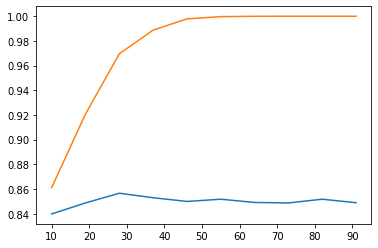

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

validation_acc = []
train_acc = []
models = []
# X_Train, X_Test, Y_Train, Y_Test = train_test_split(features, labels, test_size=0.1, random_state=20)
for depth in range(10, 100, 9):
    model = RandomForestClassifier(n_estimators = n_trees, max_depth = depth)
    model.fit(Train_D, Y_Train)
    Y_Test_pred = model.predict(Validation_D)
    Y_Train_pred = model.predict(Train_D)
    validation_acc.append(accuracy_score(Y_validate, Y_Test_pred))
    train_acc.append(accuracy_score(Y_Train, Y_Train_pred))
    models.append(model)
plt.plot(range(10, 100, 9), validation_acc)
plt.plot(range(10, 100, 9), train_acc)
plt.show()

In [14]:
print(max(validation_acc))
model = models[np.argmax(validation_acc)]
Y_Pred = model.predict(Test_D)
print(accuracy_score(Y_Test, Y_Pred))

0.8565656565656565
0.856
